## Plot SS Bouncepoints

In [50]:
import warnings
warnings.filterwarnings('ignore')

import sqlite3
conn = sqlite3.connect("ss.db")
cur  = conn.cursor()

import time
import os

import pandas as pd

qry = """SELECT bouncepoints_full.ID_Full, 
bouncepoints_full.Event, 
bouncepoints_full.Station, 
bouncepoints_full.Network, 
bouncepoints_full.Range, 
bouncepoints_full.MidLat, 
bouncepoints_full.MidLon, 
bouncepoints_full.EvtTime, 
bouncepoints_full.BAzimuth, 
snr.SNR
FROM bouncepoints_full
LEFT JOIN snr 
ON bouncepoints_full.ID_Full=snr.ID_Full
WHERE snr.SNR > 3.0 """

dfds = pd.read_sql_query(qry, conn, index_col=["ID_Full"])
dfds

conn.close()

dfds

,Event,Station,Network,Range,MidLat,MidLon,EvtTime,BAzimuth,SNR
ID_Full,,,,,,,,,
C200601040832A.GE.DSB,C200601040832A,DSB,GE,76.652433,54.361601,-73.474801,2006-01-04T08:32:37.300000Z,299.677511,4.812212
C200601040832A.GE.HLG,C200601040832A,HLG,GE,83.058887,59.084963,-71.448799,2006-01-04T08:32:37.300000Z,310.164973,3.275692
C200601040832A.GE.STU,C200601040832A,STU,GE,87.224735,57.809878,-65.864356,2006-01-04T08:32:37.300000Z,311.511539,4.559811
C200601040832A.II.BFO,C200601040832A,BFO,II,87.083405,57.328538,-65.650508,2006-01-04T08:32:37.300000Z,310.901467,4.441056
C200601040832A.II.ESK,C200601040832A,ESK,II,77.194538,56.024401,-74.497854,2006-01-04T08:32:37.300000Z,301.607763,4.202270
C200601060339A.IC.HIA,C200601060339A,HIA,IC,121.097446,62.314092,-114.701297,2006-01-06T03:40:02.400000Z,25.713422,3.758397
C200601060339A.IU.ULN,C200601060339A,ULN,IU,125.109761,67.922460,-100.697745,2006-01-06T03:40:02.400000Z,11.364619,4.065498
C200601060339A.IU.YAK,C200601060339A,YAK,IU,107.230393,57.173582,-105.096242,2006-01-06T03:40:02.400000Z,33.370125,5.307395
C200601232050A.IC.HIA,C200601232050A,HIA,IC,121.918358,64.605594,-105.782307,2006-01-23T20:50:50.000000Z,20.475543,4.602598


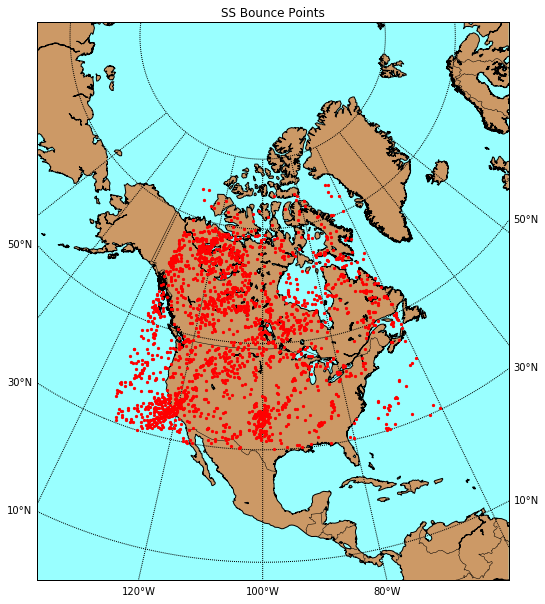

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
# Lambert Conformal Conic map.
m = Basemap(llcrnrlon=-135.,llcrnrlat=0.,urcrnrlon=45.,urcrnrlat=61.,
            projection='lcc',lat_1=35.,lat_2=45.,lon_0=-100.,
            resolution ='l',area_thresh=1000.)
# read shapefile.
#shp_info = m.readshapefile('../../../examples/huralll020','hurrtracks',drawbounds=False)
# find names of storms that reached Cat 4.
names = []

plt.figure(1,figsize=(10,10))

# draw coastlines, meridians and parallels.
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='#99ffff')
m.fillcontinents(color='#cc9966',lake_color='#99ffff')
m.drawparallels(np.arange(10,71,20),labels=[1,1,0,0])
m.drawmeridians(np.arange(-180,0,20),labels=[0,0,0,1])

x, y = m( np.array(dfds['MidLon']), np.array(dfds['MidLat']) )

m.scatter(x, y, color='red', marker = '.', zorder = 10000)

plt.title('SS Bounce Points')
plt.savefig('bpts_NA.eps')
plt.show()

In [82]:
from numpy import arange
from obspy.geodetics.base import gps2dist_azimuth

lons = arange(-140,-59,10)
lats = arange(30,71,10)

df = pd.DataFrame(columns=['Latitude', 'Longitude', 'Radius'])

radius = 10.0


ii=1
for lat in lats:
    for lon in lons:
        df.loc[ii]=[lat,lon,radius]
        ii += 1


dfbinning = pd.DataFrame(columns=['BinNumber','ID_Full','Radius'])


ii=1
for thebin in df.iterrows():
    for bp in dfds.iterrows():
        delm, az, baz = gps2dist_azimuth(thebin[1].Latitude, thebin[1].Longitude , bp[1].MidLat, bp[1].MidLon)
        deldeg = delm/1000./111.11
        if deldeg < 10.:
            dfbinning.loc[ii]=[thebin[0],bp[0],deldeg]
            ii += 1
    

In [83]:
dfbinning.query("BinNumber == 3")

,BinNumber,ID_Full,Radius
256,3,C200605161039A.GE.SFS,3.413540
257,3,C200608250044A.IU.INCN,9.999273
258,3,C200610121805A.XG.CHDE,8.747122
259,3,C200610201048A.II.ERM,7.588581
260,3,M200611151114A.II.NNA,4.362545
261,3,C200705302022A.IU.LVC,8.277054
262,3,C200708152340A.IU.YSS,8.428609
263,3,C200708180252A.IU.YSS,8.476656
264,3,C200711141540A.IU.PET,7.535106
265,3,C200711141540A.IU.YSS,4.547659
